# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [24]:
!pip install citipy

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [26]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 576


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [27]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Fetch weather data for the city, parse the JSON and retrieve data
        response = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_date = response['dt']


        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | hammerfest
Processing Record 4 of Set 1 | anadyr
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | codrington
Processing Record 7 of Set 1 | whitehorse
Processing Record 8 of Set 1 | tiksi
Processing Record 9 of Set 1 | edinburgh of the seven seas
Processing Record 10 of Set 1 | port mathurin
Processing Record 11 of Set 1 | shiyan
Processing Record 12 of Set 1 | thompson
Processing Record 13 of Set 1 | potam
Processing Record 14 of Set 1 | puerto baquerizo moreno
Processing Record 15 of Set 1 | dingzhou
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | jamestown
Processing Record 18 of Set 1 | black point
Processing Record 19 of Set 1 | tsiombe
Processing Record 20 of Set 1 | san luis de la loma
Processing Record 21 of Set 1 | qaqortoq
Processing Record 22 of Set 

In [28]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)


# Show Record Count
city_data_df.count()

City          550
Lat           550
Lng           550
Max Temp      550
Humidity      550
Cloudiness    550
Wind Speed    550
Country       550
Date          550
dtype: int64

In [29]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,43.18,82,98,26.87,TF,1707148590
1,adamstown,-25.0660,-130.1015,73.53,86,100,5.57,PN,1707148590
2,hammerfest,70.6634,23.6821,19.85,73,20,11.50,NO,1707148590
3,anadyr,64.7500,177.4833,-8.90,64,79,13.42,RU,1707148590
4,albany,42.6001,-73.9662,31.68,67,27,3.00,US,1707148375


In [30]:
# Export the City_Data into a csv
city_data_df.to_csv("cities_generated.csv", index_label="City_ID")

In [31]:
# Read saved data
city_data_df = pd.read_csv("cities_generated.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,43.18,82,98,26.87,TF,1707148590
1,adamstown,-25.0660,-130.1015,73.53,86,100,5.57,PN,1707148590
2,hammerfest,70.6634,23.6821,19.85,73,20,11.50,NO,1707148590
3,anadyr,64.7500,177.4833,-8.90,64,79,13.42,RU,1707148590
4,albany,42.6001,-73.9662,31.68,67,27,3.00,US,1707148375


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

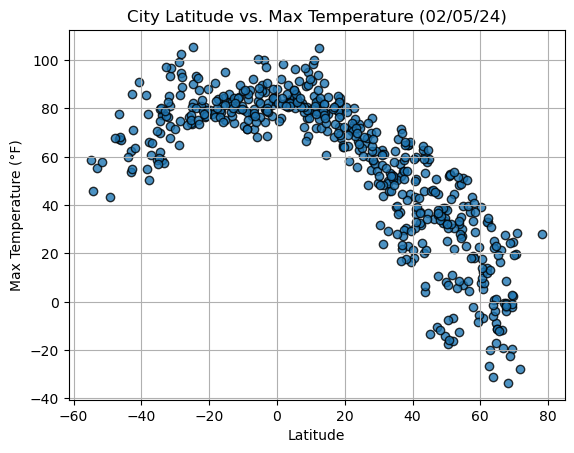

In [32]:
# Ensure matplotlib is imported
import matplotlib.pyplot as plt


# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], 
            city_data_df["Max Temp"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (°F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../WeatherPy/result_Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

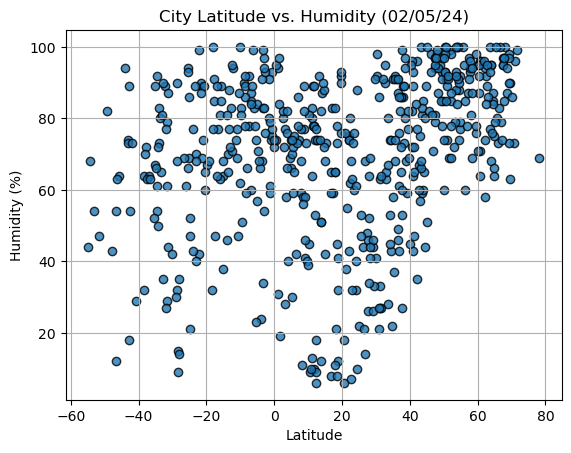

In [33]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], 
            city_data_df["Humidity"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../WeatherPy/result_Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

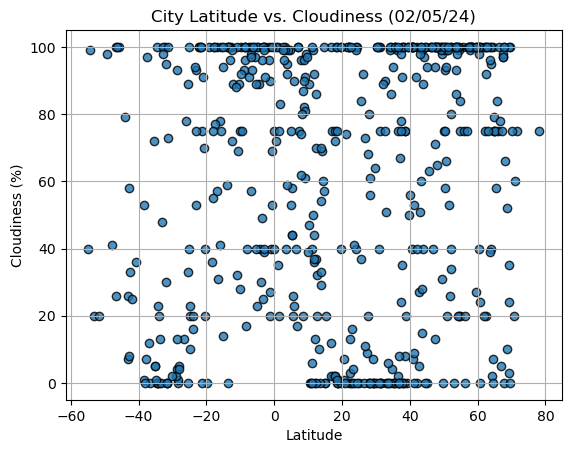

In [34]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], 
            city_data_df["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../WeatherPy/Fig3_result.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

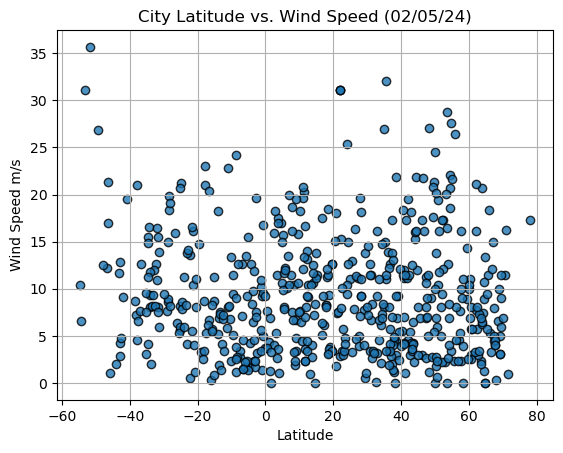

In [35]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], 
            city_data_df["Wind Speed"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed m/s")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("../WeatherPy/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [36]:
# Define a function to create Linear Regression plots
from scipy.stats import linregress

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    """
    Perform linear regression on the given x and y values and plot the regression line with the data points.

    Parameters:
    - x_values: array-like, the x values of the data.
    - y_values: array-like, the y values of the data.
    - title: str, the title of the plot.
    - y_label: str, the label for the y-axis.
    - text_coordinates: tuple, the coordinates for where to place the regression line equation on the plot.
    """
    
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate the regression values
    regress_values = x_values * slope + intercept
    
    # Create the line equation string
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the line equation on the plot
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    # Add labels and title
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    
    # Print r value
    print(f"The r-value is: {rvalue**2}")
    
    # Show plot
    return plt

In [37]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,hammerfest,70.6634,23.6821,19.85,73,20,11.50,NO,1707148590
3,anadyr,64.7500,177.4833,-8.90,64,79,13.42,RU,1707148590
4,albany,42.6001,-73.9662,31.68,67,27,3.00,US,1707148375
6,whitehorse,60.7161,-135.0538,-6.83,71,100,5.75,CA,1707148591
7,tiksi,71.6872,128.8694,-27.62,99,75,0.94,RU,1707148591


In [38]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,43.18,82,98,26.87,TF,1707148590
1,adamstown,-25.0660,-130.1015,73.53,86,100,5.57,PN,1707148590
5,codrington,-38.2667,141.9667,55.02,64,1,7.18,AU,1707148591
8,edinburgh of the seven seas,-37.0676,-12.3116,60.60,64,12,7.65,SH,1707148591
9,port mathurin,-19.6833,63.4167,79.47,67,0,14.76,MU,1707148591


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7611627959795771


<module 'matplotlib.pyplot' from '/Users/dariareichkina/anaconda3/envs/dev/lib/python3.10/site-packages/matplotlib/pyplot.py'>

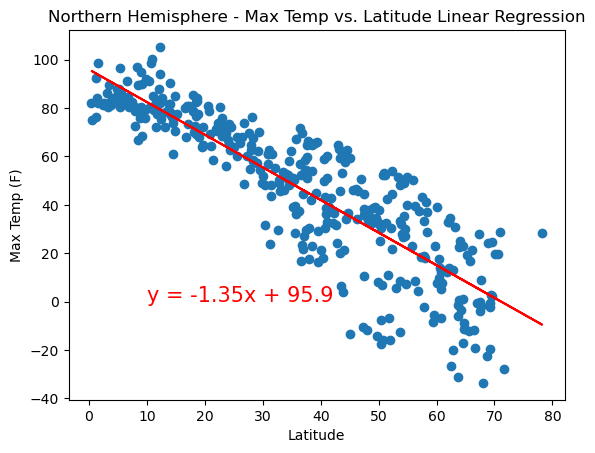

In [39]:
# Linear regression on Northern Hemisphere

# Define x and y values: Latitude and Max Temperature for Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

plot = plot_linear_regression(x_values, y_values, 
                       'Northern Hemisphere - Max Temp vs. Latitude Linear Regression', 
                       'Max Temp (F)', (10, 0))

# show plot
plot

The r-value is: 0.7611627959795771


<module 'matplotlib.pyplot' from '/Users/dariareichkina/anaconda3/envs/dev/lib/python3.10/site-packages/matplotlib/pyplot.py'>

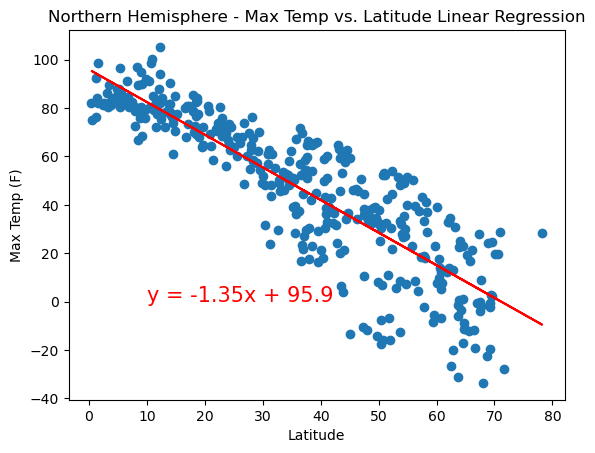

In [40]:
# Linear regression on Southern Hemisphere
# Define x and y values: 
# Latitude and Max Temperature for Northern Hemisphere

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

plot_linear_regression(x_values, y_values, 
                       'Northern Hemisphere - Max Temp vs. Latitude Linear Regression', 
                       'Max Temp (F)', (10, 0))


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.2127763081085618


<module 'matplotlib.pyplot' from '/Users/dariareichkina/anaconda3/envs/dev/lib/python3.10/site-packages/matplotlib/pyplot.py'>

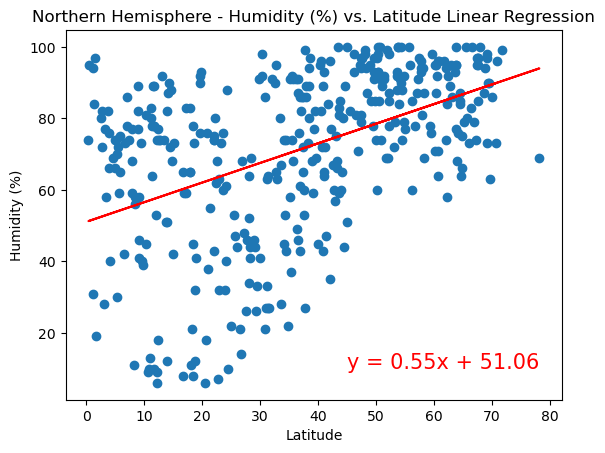

In [41]:
# Northern Hemisphere

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# Call the function with these values and appropriate labels for the Northern Hemisphere
plot_linear_regression(x_values, y_values, 
                       'Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression', 
                       'Humidity (%)', (45, 10))

The r-value is: 0.09911977146707944


<module 'matplotlib.pyplot' from '/Users/dariareichkina/anaconda3/envs/dev/lib/python3.10/site-packages/matplotlib/pyplot.py'>

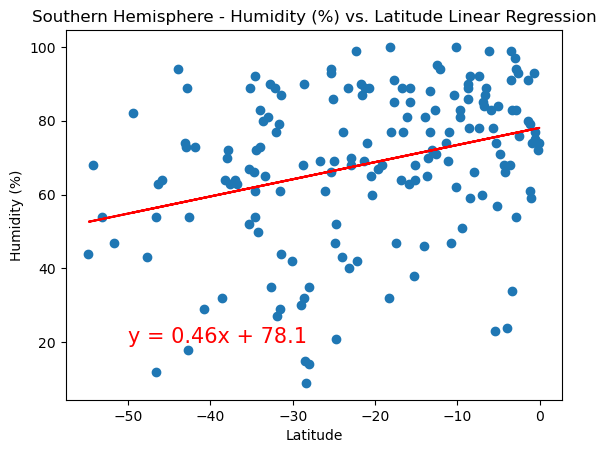

In [42]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

# Call the function with these values and appropriate labels for the Southern Hemisphere
plot_linear_regression(x_values, y_values, 
                       'Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression', 
                       'Humidity (%)', (-50, 20))

**Discussion about the linear relationship:** 

For dataset generate we can see that Northern Hemisphere, as you move away from the equator (increasing latitude), you might expect changes in humidity and max temperature due to variations in climate zones. 

The relationship is: increasing latitude correlates with increasing humidity  and decreasing max temperature

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.028619387236329178


<module 'matplotlib.pyplot' from '/Users/dariareichkina/anaconda3/envs/dev/lib/python3.10/site-packages/matplotlib/pyplot.py'>

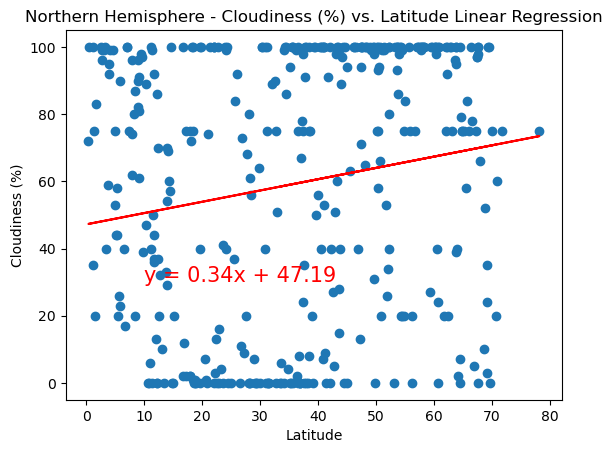

In [43]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# Call the function with these values and appropriate labels for the Northern Hemisphere
plot_linear_regression(x_values, y_values, 
                       'Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression', 
                       'Cloudiness (%)', (10, 30))


The r-value is: 0.1409917399239668


<module 'matplotlib.pyplot' from '/Users/dariareichkina/anaconda3/envs/dev/lib/python3.10/site-packages/matplotlib/pyplot.py'>

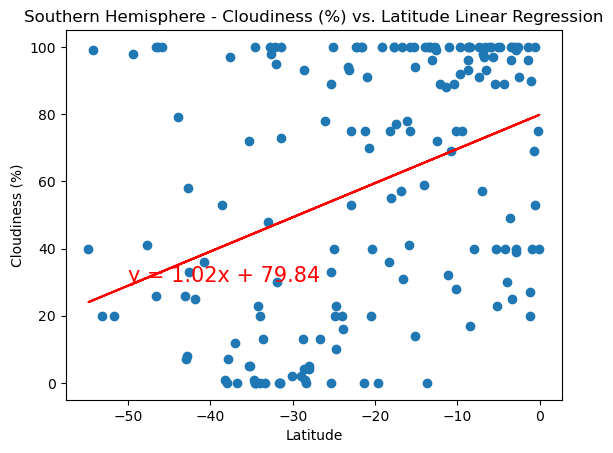

In [44]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

# Call the function with these values and appropriate labels for the Southern Hemisphere
plot_linear_regression(x_values, y_values, 
                       'Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression', 
                       'Cloudiness (%)', (-50, 30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.002656710696347541


<module 'matplotlib.pyplot' from '/Users/dariareichkina/anaconda3/envs/dev/lib/python3.10/site-packages/matplotlib/pyplot.py'>

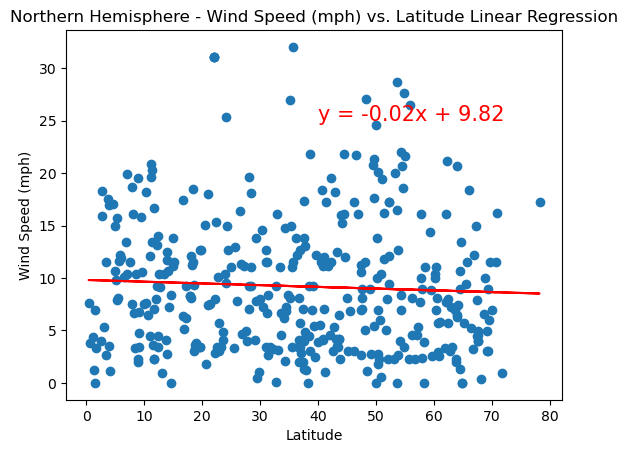

In [45]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

plot_linear_regression(x_values, y_values, 
                       'Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression', 
                       'Wind Speed (mph)', (40, 25))

The r-value is: 0.10721086880849506


<module 'matplotlib.pyplot' from '/Users/dariareichkina/anaconda3/envs/dev/lib/python3.10/site-packages/matplotlib/pyplot.py'>

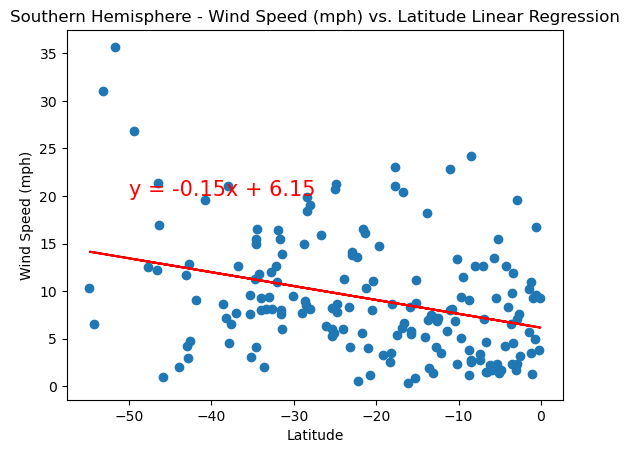

In [46]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

plot_linear_regression(x_values, y_values, 
                       'Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression', 
                       'Wind Speed (mph)', (-50, 20))

**Discussion about the linear relationship:** 


The linear regression plots for cloudiness vs. latitude in both hemispheres show a weak positive relationship, suggesting that cloudiness slightly increases with latitude. However, the relationship is not strong, as indicated by the very slight slope of the regression lines and the wide scatter of data points.

For wind speed vs. latitude, both hemispheres exhibit a very slight negative relationship, with wind speed decreasing marginally as one moves away from the equator. This relationship is also weak, with the regression lines being nearly flat and the data points showing high variability around the lines.